# Trans Effect Pancan Pearson Correlations 

This notebook graphs pearson correlations between EGFR proteomics and PLAU for supplemental figure. It also calculates the average pearson correlation and p value across all of the cancer types.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat
import scipy.stats
import re
import sys 
import math

import cptac
import cptac.utils as u
import plot_utils as p

/Users/Lindsey/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
cptac warning: Your version of cptac (0.8.7) is out-of-date. Latest is 0.8.8. Please run 'pip install --upgrade cptac' to update it. (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 11)


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load all cptac cancers
brain = cptac.Gbm()
ccrcc = cptac.Ccrcc()
en = cptac.Endometrial()
hnscc = cptac.Hnscc()
colon = cptac.Colon()
brca = cptac.Brca()
luad = cptac.Luad()
Ovar = cptac.Ovarian()
Lscc = cptac.Lscc()

In [4]:
#cptac version
cptac.version()

'0.8.5'

In [4]:
def plot_pearson(df1,x_axis, y_axis, hue = "none", title = "", ra_stats = False, x_coor= 1.0 , y_coor = 1.0, show_plot = True, pval_trunc = 5 , x_label = "x_label", y_label = "y_label", save_file_name = "file_name"):
    #add option to insert own axis labels or by default 
    if x_label == "x_label":
        x_label = x_axis
    if y_label == "y_label":
        y_label = y_axis
        
    if hue != "none":   
      
        df1_subset = df1[[x_axis,y_axis,hue]]
        df1_subset = df1_subset.dropna(axis=0, how="any")
        count_row = df1_subset.shape[0]
        if count_row > 30:
            x1 = df1_subset[[x_axis]].values
            y1 = df1_subset[[y_axis]].values
            x1 = x1[:,0]
            y1 = y1[:,0]
            corr, pval = scipy.stats.pearsonr(x1,y1)

            sns.set(style="darkgrid")
            plt.rcParams["figure.figsize"] = (40,32)
            graph = sns.lmplot(x= x_axis, y= y_axis, data=df1_subset, hue= hue, fit_reg=False)
            sns.regplot(x=x1, y=y1, data=df1_subset,scatter = False)
            plt.xlabel(x_label, fontsize=20)
            plt.ylabel( y_label, fontsize=20)
            graph.set(title = title)
        else:
            return 0

    if hue == "none":
        
        df1_subset = df1[[x_axis,y_axis]]
        df1_subset = df1_subset.dropna(axis=0, how="any")
        count_row = df1_subset.shape[0]
        if count_row > 30:
            x1 = df1_subset[[x_axis]].values
            y1 = df1_subset[[y_axis]].values
            x1 = x1[:,0]
            y1 = y1[:,0]
            corr, pval = scipy.stats.pearsonr(x1,y1)

            sns.set(style="darkgrid")
            plt.rcParams["figure.figsize"] = (70,52)
            graph = sns.lmplot(x= x_axis, y= y_axis, data=df1_subset, fit_reg=False)
            sns.regplot(x=x1, y=y1, data=df1_subset,scatter = False)
            plt.title(label = title, fontsize = 40)
            plt.xlabel(x_label, fontsize=30)
            plt.ylabel( y_label, fontsize=30)
            plt.xticks(fontsize = 25)
            plt.yticks(fontsize = 25)
        else:
            return 0

    if ra_stats:
        pval = myTrunc(pval,pval_trunc)
        corr = myTrunc(corr,3)
        plt.text(x_coor,y_coor, "Correlation: %s\nPvalue: %s"%(corr,pval), fontsize = 17)
        
    if save_file_name != "file_name":
        plt.tight_layout()
        plt.subplots_adjust(top=0.88)
        plt.savefig(save_file_name+'.png', dpi = 300)
    if show_plot:
        plt.show()
        plt.clf()
        plt.close()



In [5]:
'''
@Param df1: Dataframe. Contains numeric values (such as proteomics) for pearson correlaton 
@Param x_axis: String. Used as the label for the x-axis as well as the column name for the x-axis values.
@Param y_axis:String. Used as the label for the y-axis as well as the column name for the y-axis values.
This fuction takes a dataframe with numeric values (such as proteomics) and performs a pearson correlation analysis
between two user specified columns within the dataframe. 
The function then prints the uncorrected pvalue and coorelation value.

'''
def pearson_stats(df1, x_axis, y_axis, print_stats = True):
      
    df1_subset = df1[[x_axis,y_axis]]
    df1_subset = df1_subset.dropna(axis=0, how="any")
    count_row = df1_subset.shape[0]
    if count_row > 30:
        x1 = df1_subset[[x_axis]].values
        y1 = df1_subset[[y_axis]].values
        x1 = x1[:,0]
        y1 = y1[:,0]
        corr, pval = scipy.stats.pearsonr(x1,y1)
        if print_stats:
            print("Correlation: " + str(corr))
            print("P_value:" + str(pval))
        
        else:
            return [corr,pval]
        
    else: 
        return "Not Enough Data"
   

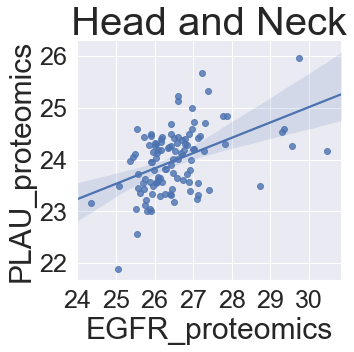

NameError: name 'pearson_stats' is not defined

In [8]:
hnscc_df = hnscc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["PLAU","EGFR"], tissue_type= "tumor")
plot_pearson(hnscc_df,"EGFR_proteomics","PLAU_proteomics", "none", title = "Head and Neck", ra_stats = False, show_plot = True,save_file_name= "png_files/Hnscc_PLAU")
pearson_stats(hnscc_df,"EGFR_proteomics","PLAU_proteomics")


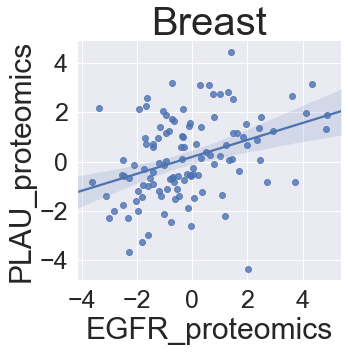

NameError: name 'pearson_stats' is not defined

In [5]:
brca_df = brca.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["PLAU","EGFR"], tissue_type= "tumor")
brca_df.columns = brca_df.columns.droplevel(1)
plot_pearson(brca_df,"EGFR_proteomics","PLAU_proteomics", "none", title = "Breast", ra_stats = False, show_plot = True,save_file_name= "png_files/Brca_PLAU")
pearson_stats(brca_df,"EGFR_proteomics","PLAU_proteomics")


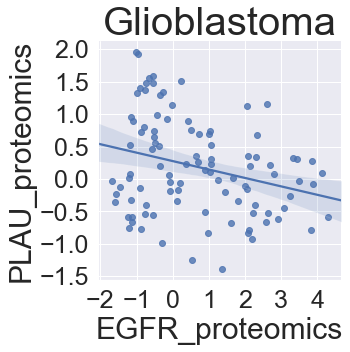

NameError: name 'pearson_stats' is not defined

In [9]:
gbm_df = brain.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["EGFR","PLAU"], tissue_type= "tumor")
plot_pearson(gbm_df,"EGFR_proteomics","PLAU_proteomics", "none", title = "Glioblastoma", ra_stats = False, show_plot = True,save_file_name= "png_files/GBM_PLAU")
pearson_stats(gbm_df,"EGFR_proteomics","PLAU_proteomics")


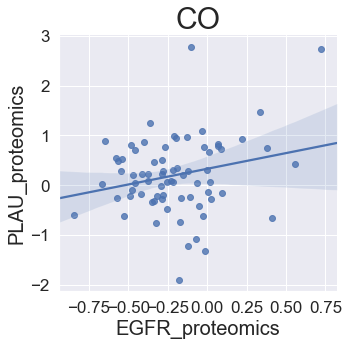

Correlation: 0.23399783521792777
P_value:0.04788960864125231


In [9]:
colon_df = colon.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["EGFR","PLAU"], tissue_type= "tumor")
p.plot_pearson(colon_df,"EGFR_proteomics","PLAU_proteomics", "none", title = "CO", ra_stats = False, show_plot = True,save_file_name= "png_files/Colon_PLAU")
pearson_stats(colon_df,"EGFR_proteomics","PLAU_proteomics")


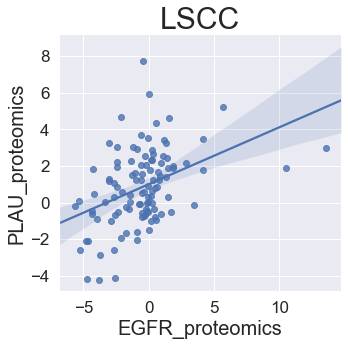

Correlation: 0.41213864832571173
P_value:9.34218524522056e-06


In [10]:
lscc_df = Lscc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["PLAU","EGFR"], tissue_type= "tumor")
lscc_df.columns = lscc_df.columns.droplevel(1)
p.plot_pearson(lscc_df,"EGFR_proteomics","PLAU_proteomics", "none", title = "LSCC", ra_stats = False, show_plot = True,save_file_name= "png_files/Lscc_PLAU")
pearson_stats(lscc_df,"EGFR_proteomics","PLAU_proteomics")


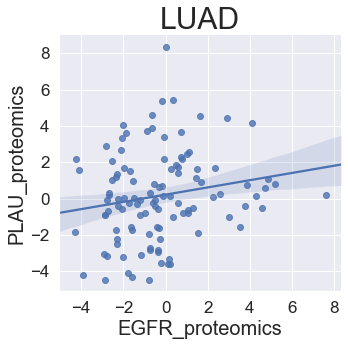

Correlation: 0.18115569303295914
P_value:0.058228363371412926


In [11]:
luad_df = luad.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["PLAU","EGFR"], tissue_type= "tumor")
luad_df.columns = luad_df.columns.droplevel(1)
p.plot_pearson(luad_df,"EGFR_proteomics","PLAU_proteomics", "none", title = "LUAD", ra_stats = False, show_plot = True,save_file_name= "png_files/Luad_PLAU")
pearson_stats(luad_df,"EGFR_proteomics","PLAU_proteomics")


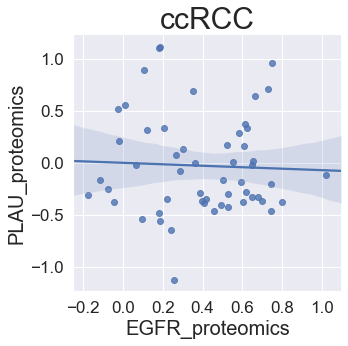

Correlation: -0.0412260553346003
P_value:0.7672410757139023


In [12]:
ccrcc_df = ccrcc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["PLAU","EGFR"], tissue_type= "tumor")
ccrcc_df.columns = ccrcc_df.columns.droplevel(1)
p.plot_pearson(ccrcc_df,"EGFR_proteomics","PLAU_proteomics", "none", title = "ccRCC", ra_stats = False, show_plot = True,save_file_name= "png_files/Renal_PLAU")
pearson_stats(ccrcc_df,"EGFR_proteomics","PLAU_proteomics")


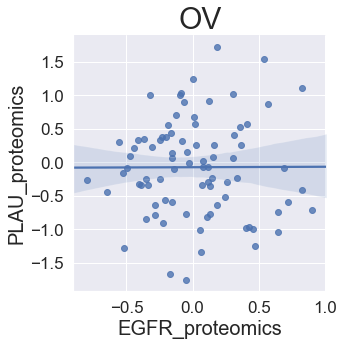

Correlation: 0.0034756705031338438
P_value:0.975122214747534


In [13]:
ovar_df = Ovar.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["PLAU","EGFR"], tissue_type= "tumor")
ovar_df.columns = ovar_df.columns.droplevel(1)
p.plot_pearson(ovar_df,"EGFR_proteomics","PLAU_proteomics", "none", title = "OV", ra_stats = False, show_plot = True,save_file_name= "png_files/Ovarian_PLAU")
pearson_stats(ovar_df,"EGFR_proteomics","PLAU_proteomics")


# Average P value and Correlation 

The manuscript mentions that the average correlation for PLAU is 0.166. This is derivation of that number

In [24]:
alldf = [hnscc_df, luad_df, lscc_df, ccrcc_df, colon_df, brca_df, gbm_df, ovar_df]
all_pval = []
all_corr = []

for df in alldf:
   
    stats = pearson_stats(df,"EGFR_proteomics","PLAU_proteomics", print_stats=False)
    all_corr.append(stats[0])
    all_pval.append(stats[1])

    

In [26]:
print("Avg correlation: " + str(stat.mean(all_corr)))
print("Avg p value: " + str(stat.mean(all_pval)))

Avg correlation: 0.1664782554456123
Avg p value: 0.23171503747284522
